In [60]:
import numpy as np
import matplotlib.pyplot as plt

In [61]:
def find_nearest_centroids(X, centroids):

    K = centroids.shape[0]
    
    idx = np.zeros(X.shape[0])
#note each row stands for the RGB values of a pixel
    for i in range(X.shape[0]):
        distance = []
#checking which centroid is closest to the pixel        
        for j in range(centroids.shape[0]):
            normij = np.linalg.norm(X[i] - centroids[j]) 
#assigning the normij to the jth entry in distance, hence argmin(distance) returns the j-th entry with minimum normij
            distance.append(normij)
    
        idx[i] = np.argmin(distance)
    
    return idx

In [62]:
def compute_centroids(X, idx, K):
    
    m, n = X.shape
    
    centroids = np.zeros((K, n))
#assinging pixels to centroids
    for i in range(K):   
        points = X[idx == i]   
#calculating new centroids
        centroids[i] = np.mean(points, axis = 0)
  
    return centroids

In [63]:
def run_kMeans(X, initial_centroids, max_iters=10):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_nearest_centroids(X, centroids) 
            
        # compute new centroids
        centroids = compute_centroids(X, idx, K)
        
    plt.show() 
    return centroids, idx

In [64]:
def kMeans_init_centroids(X, K):

    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

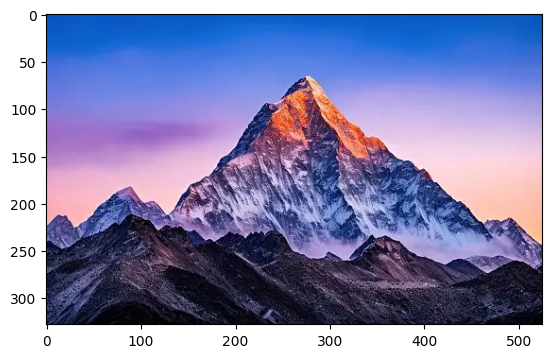

In [65]:
original_img = plt.imread('mountain.png')
plt.imshow(original_img)

In [66]:
# reshape the image to m by 3 martix (m pixels) 3 colours RGB values
X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

In [67]:
K = 8
max_iters = 10

initial_centroids = kMeans_init_centroids(X_img, K)

# K-Means
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

In [70]:
idx = find_closest_centroids(X_img, centroids)
# Replace each pixel with the color of the closest centroid
X_recovered = centroids[idx, :] 

# Reshape image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape) 

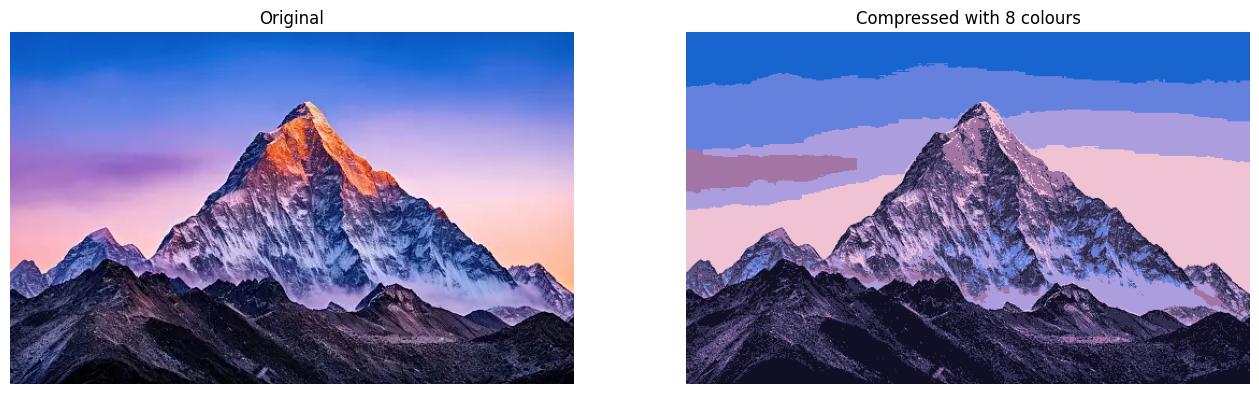

In [71]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()